# Support Vector Machine

SVM is a supervised algorithm that classifies cases by finding separator.
1. Mapping data to high-dimensional feature space.
2. Finding a separator.
Mapping data into higher-dimensional space is called kernelling. Kernelling function may be linear, Polynomial, Radio Basis function, Sigmoid.<br>
### Advantages and Disadvantages of SVM <br>
Advantages :- Accurate in high-dimensional spaces. Memory efficient <br>
Disadvatnages :- Prone to over-fitting. No probability estimation. Small datasets.<br>
### SVM applications
* Image recognition
* Text category assignment
* Detecting spam
* Sentiment analysis
* Gene Expression classification
* Outlier Detection and clustering

### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score, jaccard_score

/home/chaitanya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Loading the dataset

In [2]:
data = pd.read_csv("CellSamplesData.csv")

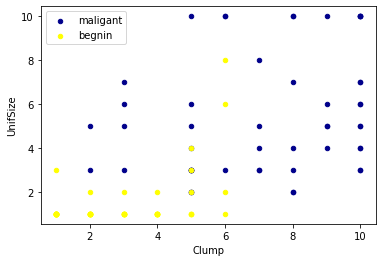

In [3]:
# Scatter plot to visualize the data
ax = data[data["Class"] == 4][0:50].plot(kind="scatter", x="Clump", y="UnifSize", color="DarkBlue", label="maligant");
data[data["Class"] == 2][0:50].plot(kind="scatter", x="Clump", y="UnifSize", color="Yellow", label="begnin", ax=ax);
plt.show()

In [4]:
# Convert the class column to integer
data = data[pd.to_numeric(data["BareNuc"], errors="coerce").notnull()]
data["BareNuc"] = data["BareNuc"].astype("int")

In [5]:
# X variable contains the features used for classification
X = np.asarray(data[["Clump", "UnifSize", "UnifShape", "MargAdh", "SingEpiSize", "BareNuc", "BlandChrom", "NormNucl", "Mit"]])

# Convert the "Class" column to integer
data["Class"] = data["Class"].astype("int")

# Y variable contains the target variable
Y = np.asarray(data["Class"])

In [6]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
print("Train data size : {} {}".format(X_train.shape, Y_train.shape))
print("Test data size : {} {}".format(X_test.shape, Y_test.shape))

Train data size : (546, 9) (546,)
Test data size : (137, 9) (137,)


In [7]:
# Creating the SVM model
clf = svm.SVC(kernel = "rbf")
clf.fit(X_train, Y_train)

SVC()

In [8]:
# Predicting the test data
y_hat = clf.predict(X_test)

In [9]:
# This function plots the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title = "Confusion Matrix", cmap = plt.cm.Blues):
    if normalize :
        cm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else :
        print("Confusion matrix, without normalization")
    print(cm)
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = ".2f" if normalize else "d"
    tresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", color = "white" if cm[i, j] > tresh else "black")
    plt.tight_layout()
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


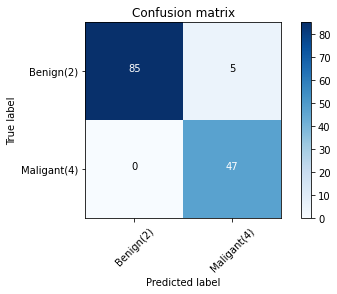

In [10]:
# Plotting the confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_hat, labels = [2,4])
np.set_printoptions(precision = 2)
print(classification_report(Y_test, y_hat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ["Benign(2)", "Maligant(4)"], normalize = False, title = "Confusion matrix")

In [11]:
print("F1 Score : {}".format(f1_score(Y_test, y_hat, average="weighted")))
print("Jaccard Score : {}".format(jaccard_score(Y_test, y_hat, pos_label=2)))

F1 Score : 0.9639038982104676
Jaccard Score : 0.9444444444444444
